### Objective:
     To build a classifier model to determine the bank's customer will leave or not using Neural Network

### Steps:
    
    *) Reading and Exploring the data.
    
    *) Dividing the data into Train and Test set along with Normalization.
    
    *) Building a model:
        
        1). Simple model with one hidden layer to find the appropraite batch_size for generalisibility.
        2). Trying with multiple(2 to 5) hidden layers.
        3). Early stopping and Batch Normalisation.
    
    *) Predicting the result
        

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
tf.__version__

'2.3.0'

In [5]:
churn_df = pd.read_csv("/content/drive/My Drive/NN assignment/Churn_Modelling.csv")

In [6]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_df.shape

(10000, 14)

In [8]:
## Deleting RowNumber,Surname,CustomerId column as it of no use
churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace= True)

In [9]:
churn_df.shape

(10000, 11)

In [10]:
churn_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
churn_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

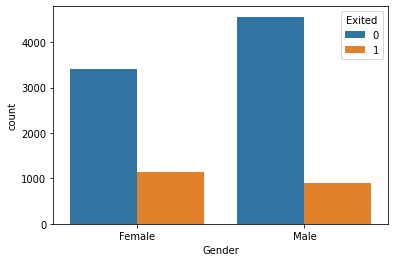

In [14]:
sns.countplot(x='Gender', hue= 'Exited',data = churn_df)

 Female exited count is higher than the male.

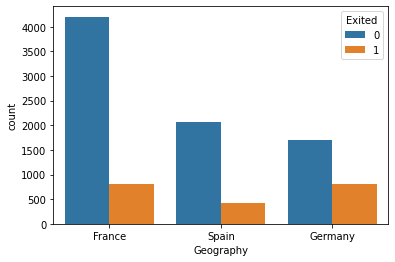

In [15]:
sns.countplot(x= 'Geography', hue = 'Exited', data = churn_df)

Germany has higher exited customer followed by france and spain.

###### Class '0' is over representive.

In [16]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [17]:
churn_df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [18]:
churn_df.kurtosis()

CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

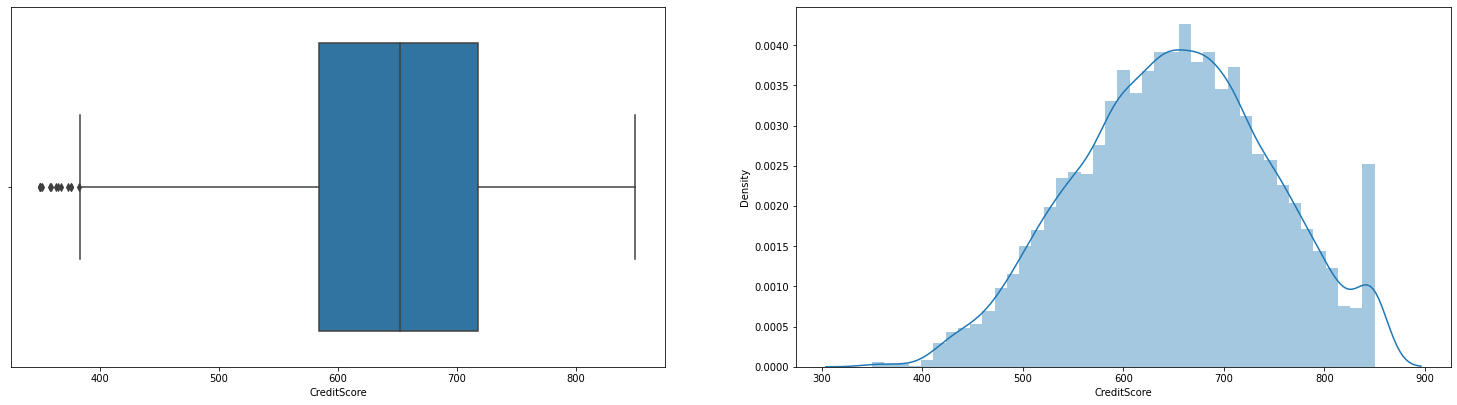

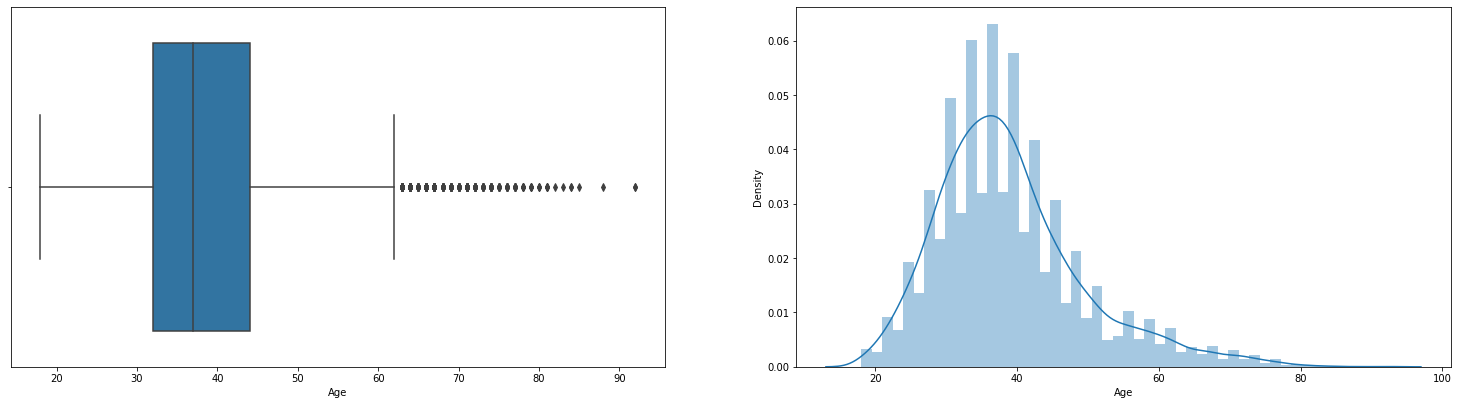

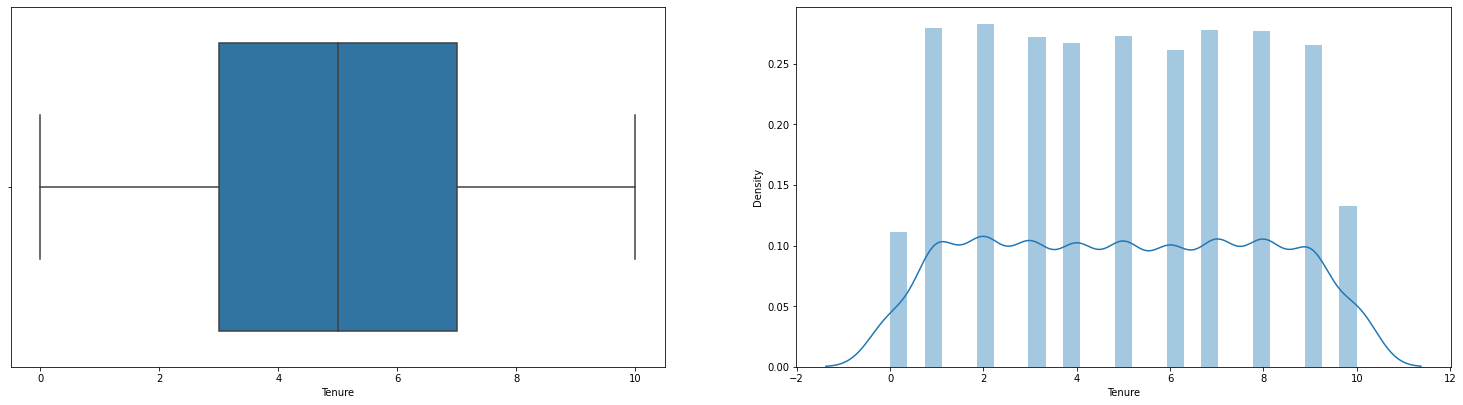

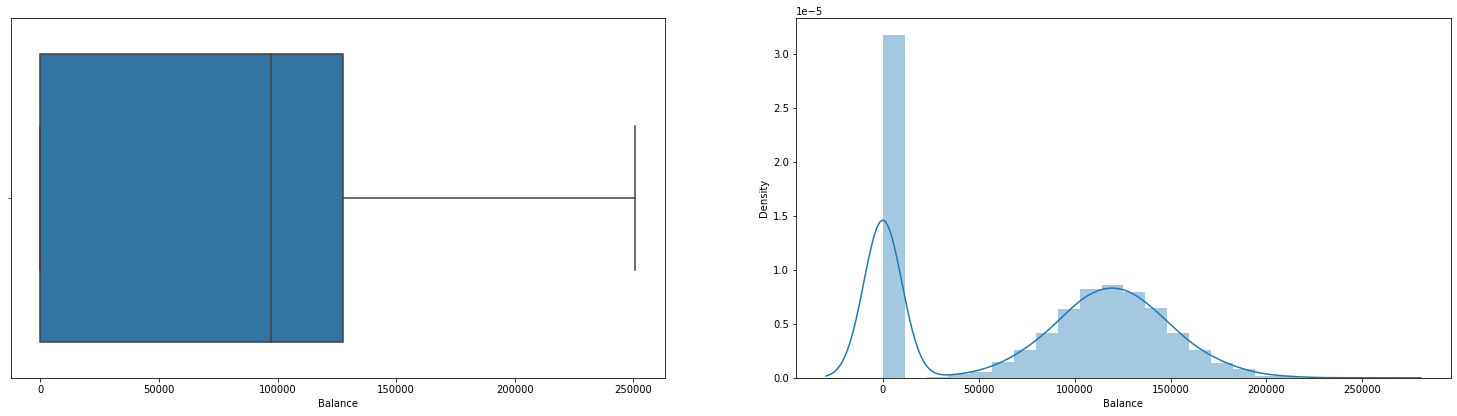

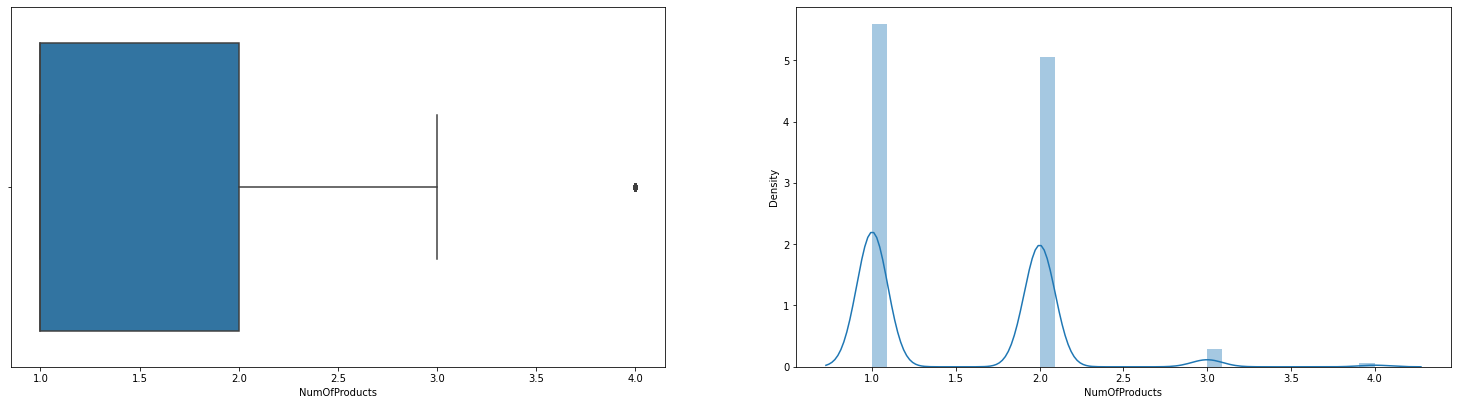

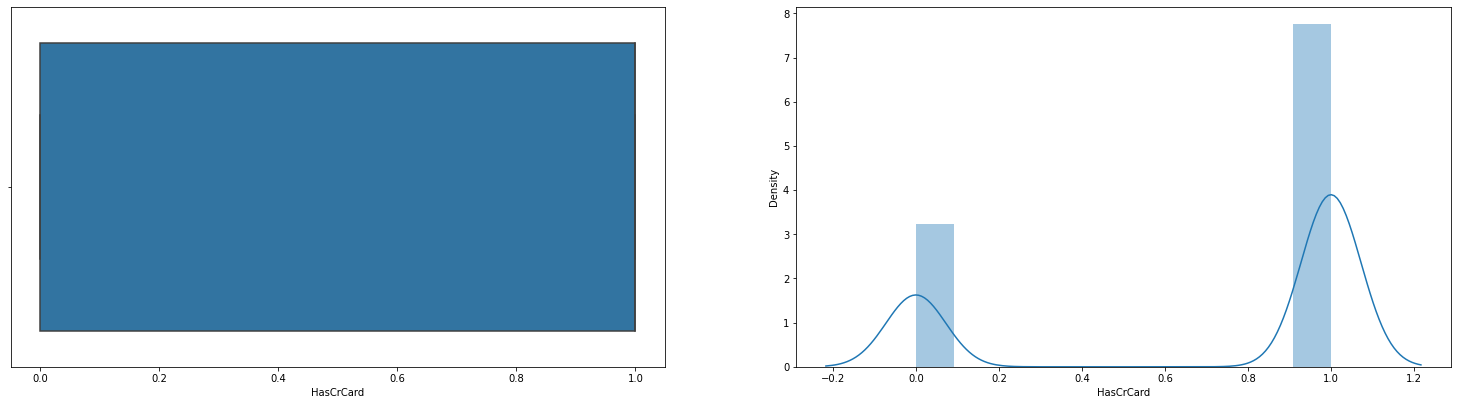

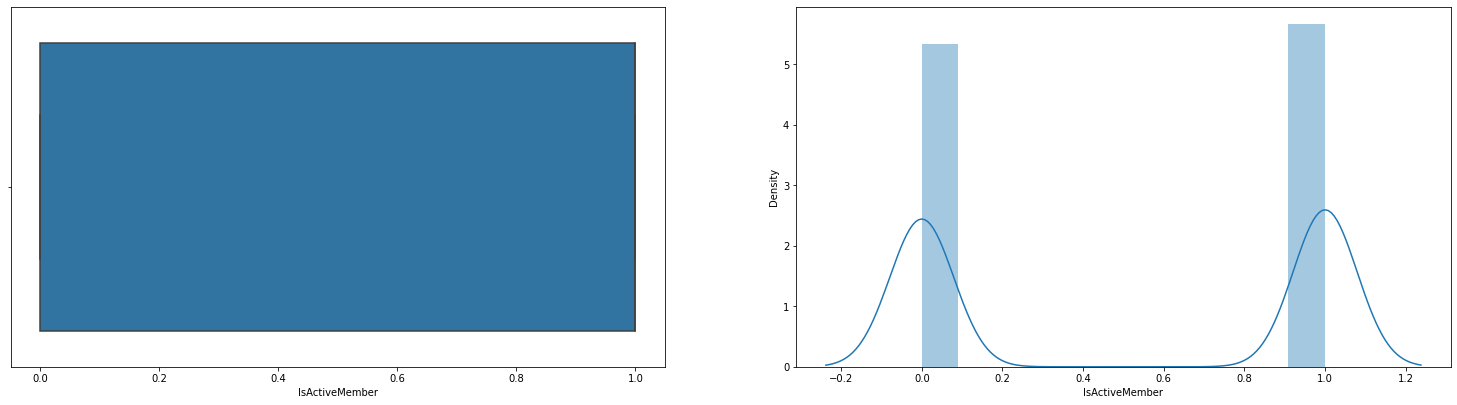

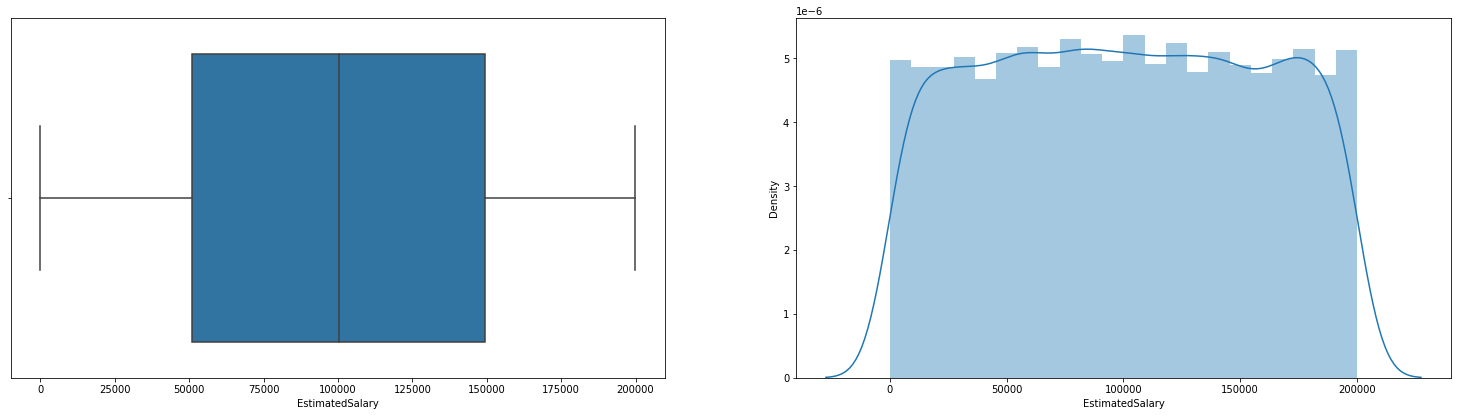

In [19]:
col = pd.Series(churn_df.select_dtypes(include = ['int32','int64','float64']).columns)
for i in range(0, len(col)-1):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(churn_df[col[i]], ax = axes[0])
    sns.distplot(churn_df[col[i]], ax = axes[1])
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

Credit score and Age column has outliers. Credit score is left skewed and Age column is right skewed

###### Converting the categorical column Geography and Gender column using Label Encoding

In [20]:
LE = LabelEncoder()

In [21]:
churn_df[['Geography','Gender']] = churn_df[['Geography','Gender']].apply(LE.fit_transform)

In [ ]:
#churn_df['Gender'] = LE.fit_transform(churn_df['Gender'])

In [ ]:
##One hot encoding on Geography column

In [ ]:
#churn_df = pd.get_dummies(churn_df,columns = ['Geography'],drop_first = True)

In [22]:
churn_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
churn_df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

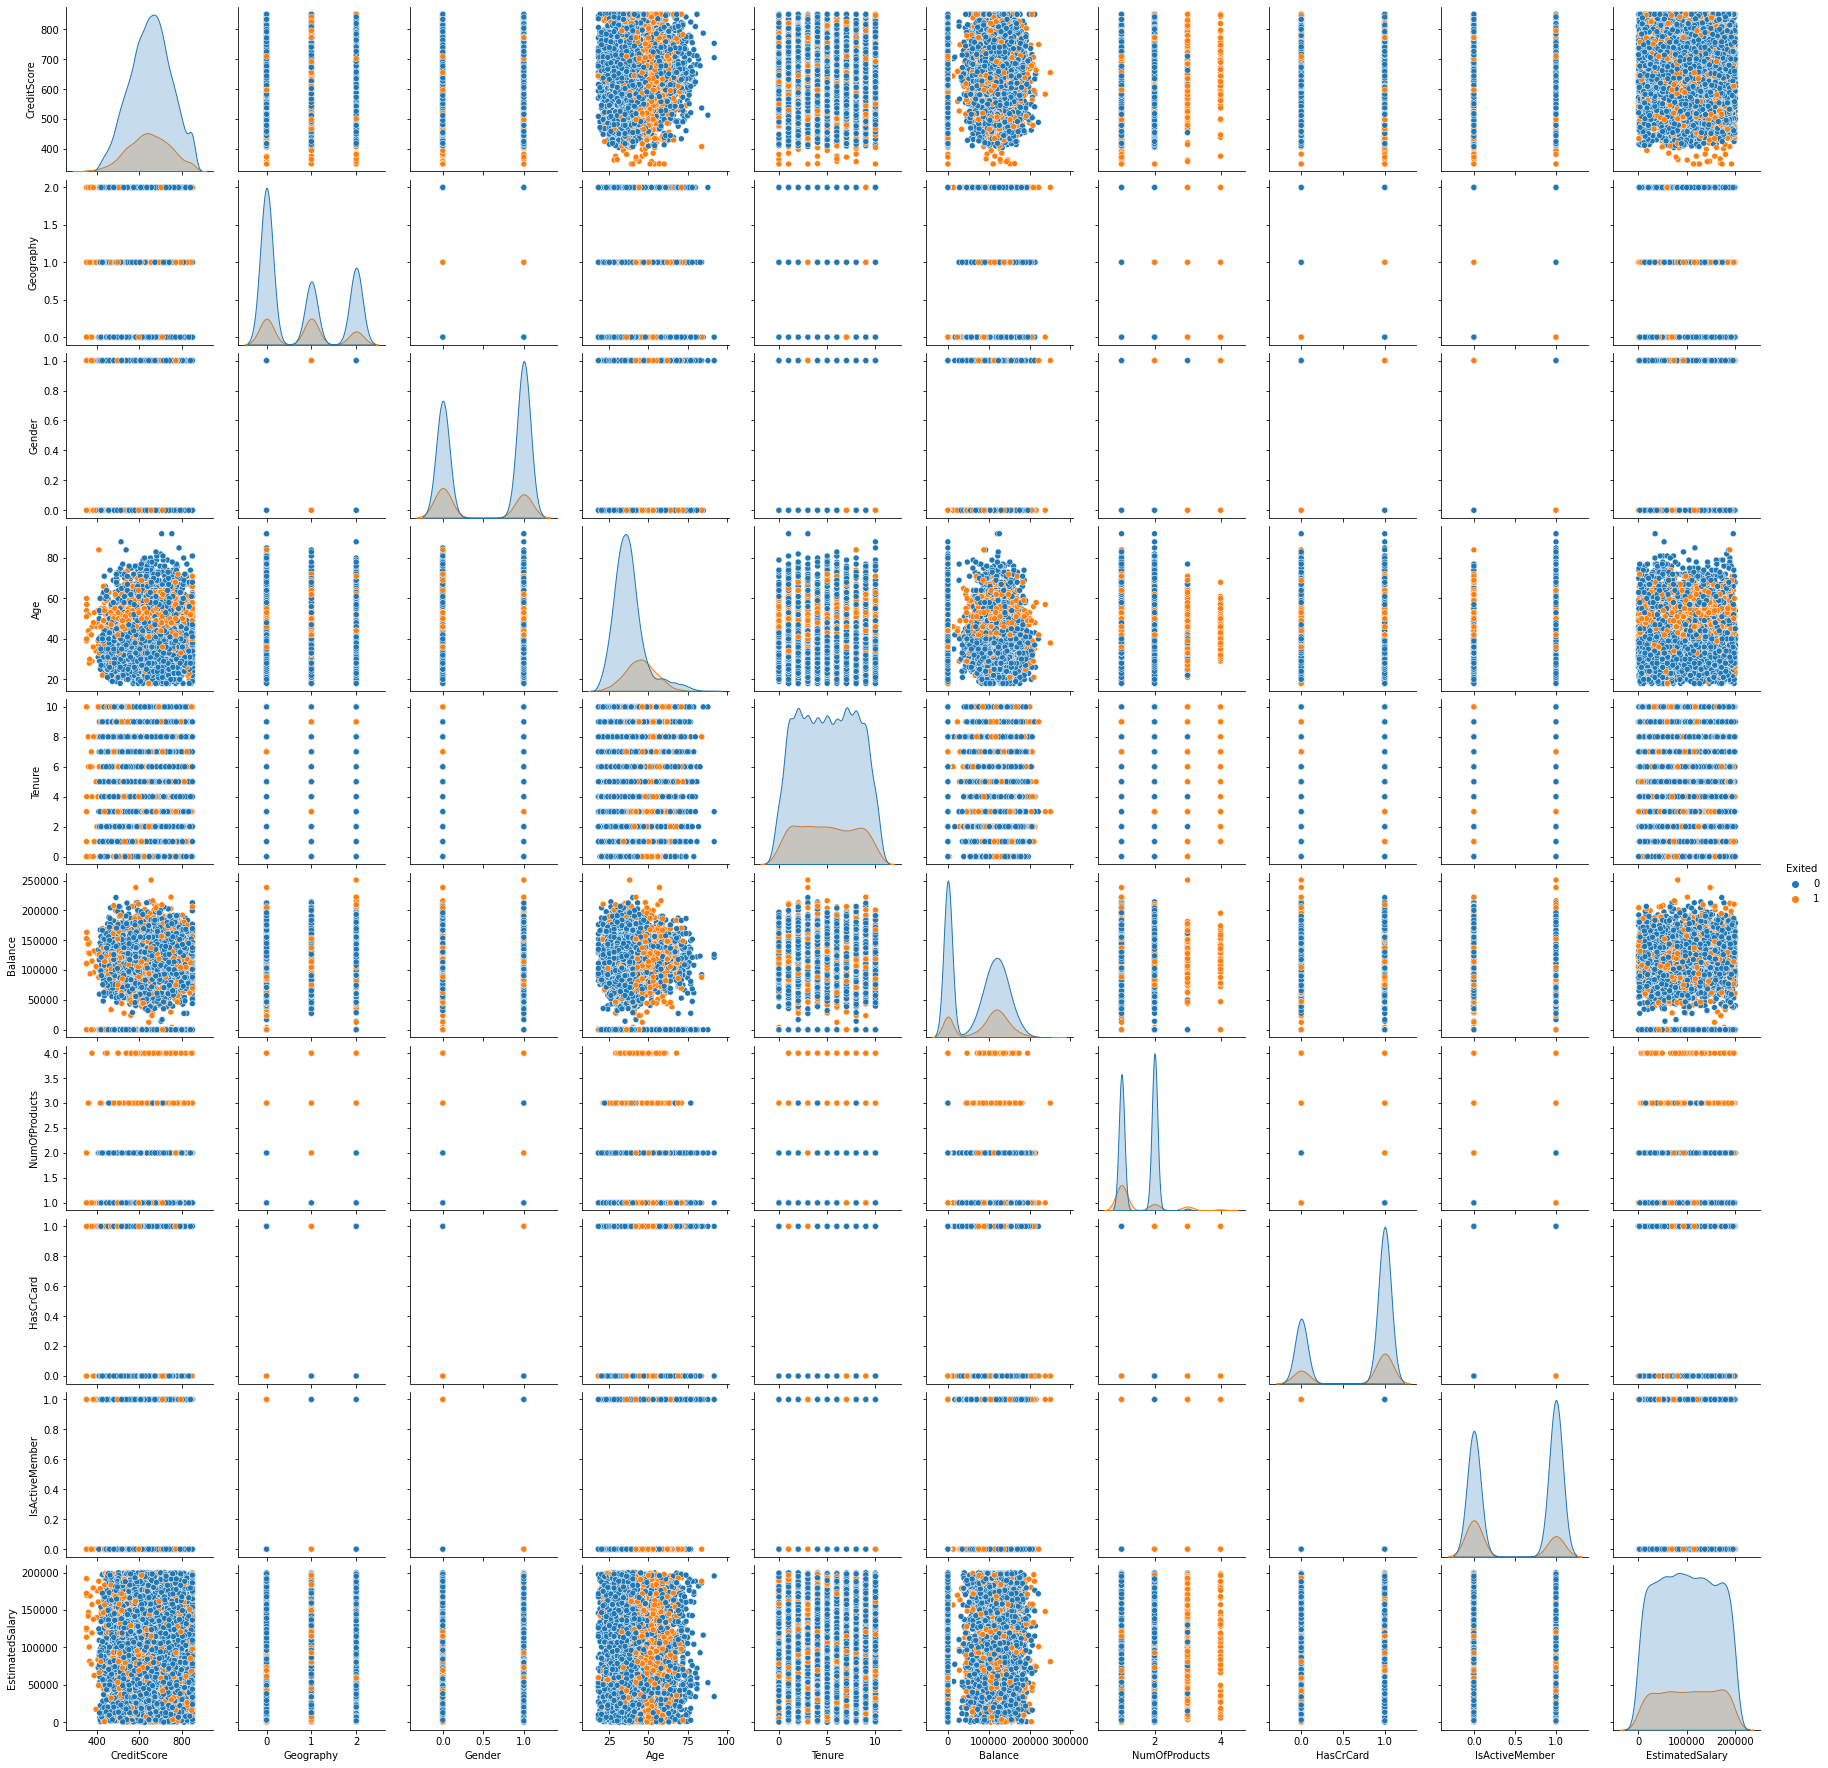

In [ ]:
sns.pairplot(churn_df,diag_kind = 'kde',hue = 'Exited')

In [ ]:
## Feature and Target Set

In [23]:
x = churn_df.drop('Exited',axis=1)

In [24]:
y= churn_df['Exited']

In [ ]:
x.shape

(10000, 10)

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.shape

(10000,)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state = 123)

In [ ]:
#x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size= 0.2,random_state = 123)

In [26]:
print(x_train.shape)
print(y_train.shape)
#print(x_val.shape)
#print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)

# Scaling the train set
X_train = sc.transform(x_train)

# Scaling the validation set
#x_val = StandardScaler().fit_transform(x_val)

In [28]:
# Scaling the test set
X_test = sc.transform(x_test)

### Initializing and building the model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.activations import relu

In [ ]:
## Selecting batch_size.

In [34]:
NN = Sequential()

In [35]:
NN.add(Dense(15, activation = 'relu',input_shape=(10,))) 
NN.add(Dense(1, activation = 'sigmoid')) 

In [36]:
for l in NN.layers:
  print(l.name,l.input_shape,'==>',l.output_shape)
 
print()
print(NN.summary())

dense_2 (None, 10) ==> (None, 15)
dense_3 (None, 15) ==> (None, 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


model training accuracy : [0.5871428847312927, 0.7639285922050476, 0.8116071224212646, 0.8146428465843201, 0.818928599357605, 0.8214285969734192, 0.8239285945892334, 0.8276785612106323, 0.8287500143051147, 0.8299999833106995, 0.8324999809265137, 0.8339285850524902, 0.8364285826683044, 0.8405357003211975, 0.8407142758369446, 0.8450000286102295, 0.8448214530944824, 0.8471428751945496, 0.847678542137146, 0.847678542137146, 0.8500000238418579, 0.8507142663002014, 0.8516071438789368, 0.8530356884002686, 0.8544642925262451, 0.854285717010498, 0.856071412563324, 0.8550000190734863, 0.8564285635948181, 0.8566071391105652]
model validation accuracy :  [0.6858333349227905, 0.7858333587646484, 0.8054166436195374, 0.8033333420753479, 0.8058333396911621, 0.8087499737739563, 0.8120833039283752, 0.8129166960716248, 0.8129166960716248, 0.8179166913032532, 0.8212500214576721, 0.8245833516120911, 0.8262500166893005, 0.82833331823349, 0.8320833444595337, 0.8337500095367432, 0.8345833420753479, 0.83625000

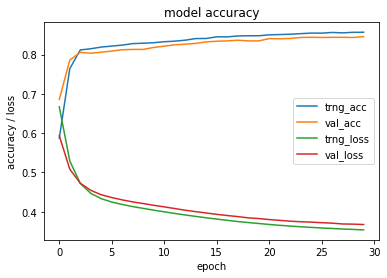

In [37]:
batch_size =101
epochs = 30

NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = NN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=False)
loss,test_accuracy  = NN.evaluate(X_test, y_test, verbose=False)
print("model training accuracy :" , history.history['accuracy'])
print("model validation accuracy : ", history.history['val_accuracy'])
print("model test accuracy : ", test_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()

[0.5871428847312927, 0.7639285922050476, 0.8116071224212646, 0.8146428465843201, 0.818928599357605, 0.8214285969734192, 0.8239285945892334, 0.8276785612106323, 0.8287500143051147, 0.8299999833106995, 0.8324999809265137, 0.8339285850524902, 0.8364285826683044, 0.8405357003211975, 0.8407142758369446, 0.8450000286102295, 0.8448214530944824, 0.8471428751945496, 0.847678542137146, 0.847678542137146, 0.8500000238418579, 0.8507142663002014, 0.8516071438789368, 0.8530356884002686, 0.8544642925262451, 0.854285717010498, 0.856071412563324, 0.8550000190734863, 0.8564285635948181, 0.8566071391105652]
[0.6858333349227905, 0.7858333587646484, 0.8054166436195374, 0.8033333420753479, 0.8058333396911621, 0.8087499737739563, 0.8120833039283752, 0.8129166960716248, 0.8129166960716248, 0.8179166913032532, 0.8212500214576721, 0.8245833516120911, 0.8262500166893005, 0.82833331823349, 0.8320833444595337, 0.8337500095367432, 0.8345833420753479, 0.8362500071525574, 0.8345833420753479, 0.8345833420753479, 0.840

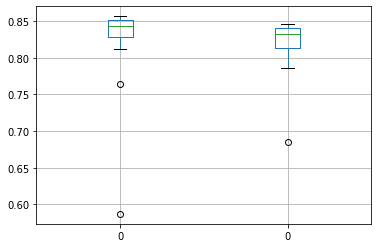

In [38]:
print(history.history['accuracy'])

print(history.history['val_accuracy'])



ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()


Observations:

From the above box plot we can conclude that batch_size = 101  gives a better generalisable model.

##### Indetifying the number of hidden layers

In [57]:
def create_dense(layer_sizes):
    print(layer_sizes)
    NN = Sequential()
    NN.add(Dense(layer_sizes[0], activation='relu', input_shape=(10,)))

    for s in layer_sizes[1:]:
        NN.add(Dense(units = s, activation = 'relu'))
        
    NN.add(Dense(units= 1, activation='sigmoid'))
    return NN

def evaluate(NN, batch_size=101, epochs=epochs):
    NN.summary()
    NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = NN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=False)
    loss,accuracy  = NN.evaluate(X_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
 
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


[30, 30]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_51 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 31        
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.862500011920929


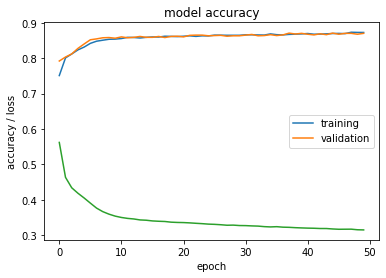

[30, 30, 30]
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_54 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_55 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 31        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8485000133514404


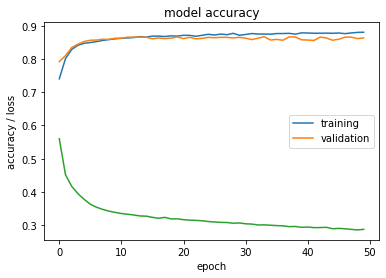

[30, 30, 30, 30]
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_58 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_59 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_60 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 31        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8514999747276306


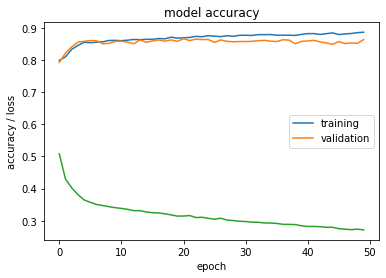

In [60]:
for layers in range(2,5):
    NN = create_dense([30] * layers)
    evaluate(NN)

Observations:
* Accuracy score is not increasing even after adding 2 to 5 hidden layers with 15,30,50 and 100 neurons each.
* Above graph shows the validation accuracy score is fluctuating, which indicates that adding these many layers
  are more than the required capacity.
* Hence, considering one hidden layer with 15 neurons.

##### splitting 1 hidden layer with 15 neurons into 3 hidden layers

In [68]:
NN = Sequential()
NN.add(Dense(7,activation = 'relu', input_shape=(10,)))
NN.add(Dense(5,activation = 'relu'))
NN.add(Dense(3,activation = 'relu'))
NN.add(Dense(1,activation = 'sigmoid'))

In [69]:
NN.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


model training accuracy : [0.43982142210006714, 0.6882143020629883, 0.7928571701049805, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.802142858505249, 0.8037499785423279, 0.8075000047683716, 0.8112499713897705, 0.8141071200370789, 0.816428542137146, 0.8192856907844543, 0.8201785683631897, 0.8201785683631897, 0.8233928680419922, 0.8257142901420593, 0.8282142877578735, 0.8303571343421936, 0.8310714364051819, 0.835178554058075, 0.84375, 0.8528571724891663, 0.8567857146263123, 0.8576785922050476, 0.8575000166893005]
model validation accuracy :  [0.5649999976158142, 0.7504166960716248, 0.7862499952316284, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7870833277702332, 0.7900000214576721, 0.7916666865348816, 0.7958333492279053, 0.8004166483879089, 0.8045833110809326, 0.8050000071525574, 0.809583306312561, 0.80

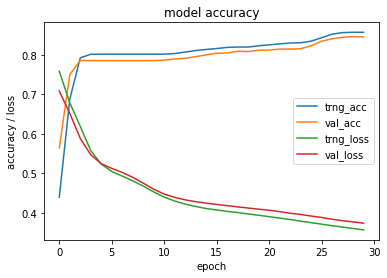

In [70]:
batch_size =101
epochs = 30

NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = NN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=False)
loss,test_accuracy  = NN.evaluate(X_test, y_test, verbose=False)
print("model training accuracy :" , history.history['accuracy'])
print("model validation accuracy : ", history.history['val_accuracy'])
print("model test accuracy : ", test_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()

[0.43982142210006714, 0.6882143020629883, 0.7928571701049805, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.801964282989502, 0.802142858505249, 0.8037499785423279, 0.8075000047683716, 0.8112499713897705, 0.8141071200370789, 0.816428542137146, 0.8192856907844543, 0.8201785683631897, 0.8201785683631897, 0.8233928680419922, 0.8257142901420593, 0.8282142877578735, 0.8303571343421936, 0.8310714364051819, 0.835178554058075, 0.84375, 0.8528571724891663, 0.8567857146263123, 0.8576785922050476, 0.8575000166893005]
[0.5649999976158142, 0.7504166960716248, 0.7862499952316284, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7858333587646484, 0.7870833277702332, 0.7900000214576721, 0.7916666865348816, 0.7958333492279053, 0.8004166483879089, 0.8045833110809326, 0.8050000071525574, 0.809583306312561, 0.8087499737739563, 0.8120833039283752, 0.8125, 0.814999997

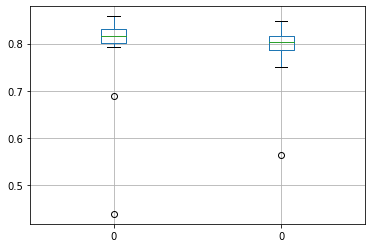

In [71]:
print(history.history['accuracy'])

print(history.history['val_accuracy'])



ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

* splitting the 15 neuron into three different layers also gives the same accuracy

##### Increasing the Epoch and trying early stopping 

In [72]:
NN = Sequential()
NN.add(Dense(7,activation = 'relu', input_shape=(10,)))
NN.add(Dense(5,activation = 'relu'))
NN.add(Dense(3,activation = 'relu'))
NN.add(Dense(1,activation = 'sigmoid'))

In [73]:
batch_size = 101    
epochs = 100

NN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = NN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),callbacks = [es])

score = NN.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))

Epoch 1/100
80/80 [==============================] - 1s 7ms/step - loss: 0.7143 - accuracy: 0.4876 - val_loss: 0.6805 - val_accuracy: 0.7155
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.7617 - val_loss: 0.6543 - val_accuracy: 0.7865
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.7971 - val_loss: 0.6355 - val_accuracy: 0.7925
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.7971 - val_loss: 0.6194 - val_accuracy: 0.7930
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.7971 - val_loss: 0.6049 - val_accuracy: 0.7930
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.7971 - val_loss: 0.5921 - val_accuracy: 0.7930
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7971 - val_loss: 0.5809 - val_accuracy: 0.7930
Epoch 8/100
8

##### Using Batch normalization

In [96]:
NN = Sequential()
NN.add(Dense(7,activation = 'relu', input_shape=(10,)))
NN.add(BatchNormalization())
NN.add(Dense(5,activation = 'relu'))
NN.add(BatchNormalization())
NN.add(Dense(3,activation = 'relu'))
NN.add(BatchNormalization())
NN.add(Dense(1,activation = 'sigmoid'))

In [97]:
batch_size = 101    
epochs = 100

NN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = NN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),callbacks = [es])

score = NN.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))

Epoch 1/100
80/80 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.6091 - val_loss: 0.6084 - val_accuracy: 0.7910
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.7406 - val_loss: 0.5518 - val_accuracy: 0.7930
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7929 - val_loss: 0.5131 - val_accuracy: 0.7985
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5000 - accuracy: 0.8015 - val_loss: 0.4868 - val_accuracy: 0.8030
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.8075 - val_loss: 0.4656 - val_accuracy: 0.8030
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.8084 - val_loss: 0.4450 - val_accuracy: 0.8065
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8117 - val_loss: 0.4261 - val_accuracy: 0.8110
Epoch 8/100
8

#### Prediction

In [98]:
prediction = np.round(NN.predict(X_test))

In [99]:
prediction[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [100]:
from sklearn import metrics
print(metrics.classification_report(prediction,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      1770
         1.0       0.44      0.79      0.57       230

    accuracy                           0.86      2000
   macro avg       0.70      0.83      0.74      2000
weighted avg       0.91      0.86      0.88      2000



In [101]:
print(metrics.confusion_matrix(prediction,y_test))

[[1538  232]
 [  48  182]]


In [102]:
print(metrics.accuracy_score(prediction,y_test))

0.86


In [ ]:
Insights:

1) 15 neurons with one hidden layer and batch_size = 101 gives better model that helps to avoid over fitting.
2) Tried with multiple hidden dense layers which gives same accuracy score, which clearly shows that 
   creating multiple layers is more than the required capacity.
3) Created 3 hidden layers with 15 neurons altogether gives the same accuracy. However, training 15 neurons in three different layers has 139
   trainable parameters whereas 15 neurons in single layer has 181 trainable parameters.
4) Early Stopping helps us to reduce the number of epochs required to train the model. Without Batch normalization 52 epochs were required and with 
   Batch Normalization it is only 21 epochs required.